# Assignment 5

Please enter your **name, surname** and **student number** instead of `"NAME-HERE"`, `"SURNAME-HERE"`, `"NUMBER-HERE"` below

In [38]:
student = {
    'name' : "Çağrı" ,
    'surname' : "Ertem", 
    'studentNumber' : "2360626"
}

print(student)

{'name': 'Çağrı', 'surname': 'Ertem', 'studentNumber': '2360626'}


In [39]:
from pomegranate import *

We will use the `pomegranate` package. To install it open terminal prompt from Anaconda, and type 
~~~~
conda install -c anaconda pomegranate
~~~~

Alternatively, you can use `pip` to install this package.
~~~~
pip install pomegranate
~~~~

To import see above i.e. `from pomegranate import *`. [You can find more information about the python-constraint package here](https://labix.org/python-constraint).

### Part 1 - Bayesian Networks
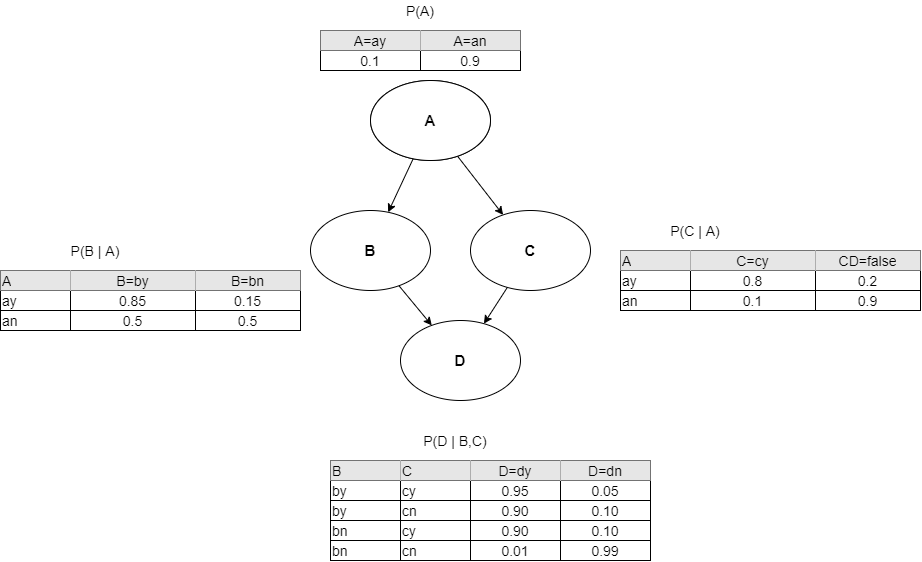

1-a) Above you see a Bayesian network **(20 points)**

- Implement this Bayesian network in `pomegranate`.
- Calculate $P(A= ay| C= cy, D= dy)$ in `pomegranate`. 


In [40]:
node_A = Node(DiscreteDistribution({'ay': 0.1, 'an': 0.9}), name="A")

#P(B/A)
PBA = ConditionalProbabilityTable([
    ['ay','by', 0.85],              
    ['ay', 'bn', 0.15],
    ['an','by', 0.5],
    ['an','bn',0.5]
    ], [node_A.distribution])

node_B = Node(PBA, name="B")

#P(C/A)
PCA = ConditionalProbabilityTable([
    ['ay','cy', 0.8],              
    ['ay', 'cn', 0.2],
    ['an','cy', 0.1],
    ['an','cn',0.9]
    ], [node_A.distribution])

node_C = Node(PCA, name="C")

#P(D/B,C)
PDBC = ConditionalProbabilityTable([
    ['by','cy', 'dy', 0.95],              
    ['by', 'cy', 'dn', 0.05],
    ['by','cn', 'dy', 0.9],
    ['by', 'cn', 'dn', 0.1],
    ['bn', 'cy', 'dy', 0.9],
    ['bn', 'cy', 'dn', 0.1],
    ['bn', 'cn', 'dy', 0.01],
    ['bn', 'cn', 'dn', 0.99]
    ], [node_B.distribution, node_C.distribution])

node_D = Node(PDBC, name="D")

model = BayesianNetwork()

model.add_nodes(node_A, node_B, node_C, node_D)

model.add_edge(node_A, node_B)
model.add_edge(node_A, node_C)
model.add_edge(node_B, node_D)
model.add_edge(node_C, node_D)

model.bake()

prob_ev1 = model.probability([["ay", "by", "cy", "dy"]])
prob_ev2 = model.probability([["an", "by", "cy", "dy"]])
prob_ev3 = model.probability([["ay", "bn", "cy", "dy"]])
prob_ev4 = model.probability([["an", "bn", "cy", "dy"]])

print((prob_ev1 + prob_ev3) / (prob_ev1 + prob_ev2 + prob_ev3 + prob_ev4)) 

0.4752600063031832


### Part 2 - N-Gram Model

In this section, you will build a simple language model that can be used to generate random text resembling a source document. Your use of external code **should be limited to built-in Python modules**, which excludes, for example, NumPy and NLTK.


2-a) **(5 points)** Write a simple tokenization function tokenize(text) which takes as input a string of text and returns a list of tokens derived from that text. Here, we define a token to be a contiguous sequence of non-whitespace characters, with the exception that any punctuation mark should be treated as an individual token. Hint: Use the built-in constant string.punctuation, found in the string module. 

~~~~python
>>> tokenize("  This is an example.  ")
['This', 'is', 'an', 'example', '.']
~~~~

~~~~python
>>> tokenize("'Medium-rare,' she said.")
["'", 'Medium', '-', 'rare', ',', "'", 'she', 'said', '.']
~~~~

In [41]:
import string

In [42]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [43]:
def tokenize(text):      
    tokens = []    
    for punct in string.punctuation:
        text = text.replace(punct, " {} ".format(punct))
        words = text.split()
    for word in words:
        tokens.append(word)  
    return tokens

tokenize("'Medium-rare,' she said.")

["'", 'Medium', '-', 'rare', ',', "'", 'she', 'said', '.']

2-b) **(10 points)** Write a function `ngrams(n, tokens)` that produces a list of all n-grams of the specified size from the input token list. Each $n$-gram should consist of a 2-element tuple (context, token), where the context is itself an $(n−1)$-element tuple comprised of the $n−1$ words preceding the current token. The sentence should be padded with $n−1$ "`<START>`" tokens at the beginning and a single "`<END>`" token at the end. If $n=1$, all contexts should be empty tuples. You may assume that $n≥1$. 

~~~~python
>>> ngrams(1, ["a", "b", "c"])
[((), 'a'), ((), 'b'), ((), 'c'), ((), '<END>')]
~~~~


~~~python
>>> ngrams(2, ["a", "b", "c"])
[(('<START>',), 'a'), (('a',), 'b'), (('b',), 'c'), (('c',), '<END>')]
~~~~



~~~~python
>>> ngrams(3, ["a", "b", "c"])
[(('<START>', '<START>'), 'a'), (('<START>', 'a'), 'b'), (('a', 'b'), 'c'), (('b', 'c'), '<END>')]
~~~~


In [44]:
def ngrams(n, tokens):
    output_list = []
    start = ["<START>"] * (n-1)
    end = ["<END>"]
    
    tokens = start + tokens + end
    
    for i in range(len(tokens)-(n-1)):
        padding_list = []
        for j in range(n-1):
            padding_list.append(tokens[i+j])
        output_list.append((tuple(padding_list), tokens[i+(n-1)]))
        
    return output_list

print(ngrams(1, ["a", "b", "c"]))
print(ngrams(2, ["a", "b", "c"]))
print(ngrams(3, ["a", "b", "c"]))

[((), 'a'), ((), 'b'), ((), 'c'), ((), '<END>')]
[(('<START>',), 'a'), (('a',), 'b'), (('b',), 'c'), (('c',), '<END>')]
[(('<START>', '<START>'), 'a'), (('<START>', 'a'), 'b'), (('a', 'b'), 'c'), (('b', 'c'), '<END>')]


**Note: Code block for questions 2-c to 2-f are at the end of this notebook.**

2-c) **(10 points)** In the `NgramModel` class, write an initialization method `__init__(self, n)` which stores the order $n$ of the model and initializes any necessary internal variables. Then write a method `update(self, sentence)` which computes the $n$-grams for the input sentence and updates the internal counts. Lastly, write a method `prob(self, context, token)` which accepts an $(n−1)$-tuple representing a context and a token, and returns the probability of that token occuring, given the preceding context. 

~~~~python
>>> m = NgramModel(1)
>>> m.update("a b c d")
>>> m.update("a b a b")
>>> m.prob((), "a")
0.3
>>> m.prob((), "c")
0.1
>>> m.prob((), "<END>")
0.2
~~~~

<hr>

~~~~python
>>> m = NgramModel(2)
>>> m.update("a b c d")
>>> m.update("a b a b")
>>> m.prob(("<START>",), "a")
1.0
>>> m.prob(("b",), "c")
0.3333333333333333
>>> m.prob(("a",), "x")
0.0
~~~~

2-d) **(20 points)** In the `NgramModel` class, write a method `random_token(self, context)` which returns a random token according to the probability distribution determined by the given context. Specifically, let $T=⟨t1,t2,⋯,tn⟩$ be the set of tokens which can occur in the given context, sorted according to Python’s natural lexicographic ordering, and let $0≤r<1$ be a random number between $0$ and $1$. Your method should return the token $t_i$ such that 

$$\sum_{j=1}^{i-1}P(t_j | context) \leq r < \sum_{j=1}^{i}P(t_j | context)$$

You should use a single call to the `random.random()` function to generate $r$.

~~~~python
>>> m = NgramModel(1)
>>> m.update("a b c d")
>>> m.update("a b a b")
>>> random.seed(1)
>>> [m.random_token(())
     for i in range(25)]
['<END>', 'c', 'b', 'a', 'a', 'a', 'b', 'b', '<END>', '<END>', 'c', 'a', 'b', '<END>', 'a', 'b', 'a', 'd', 'd', '<END>', '<END>', 'b', 'd', 'a', 'a']
~~~~

<br>

~~~~python
>>> m = NgramModel(2)
>>> m.update("a b c d")
>>> m.update("a b a b")
>>> random.seed(2)
>>> [m.random_token(("<START>",)) for i in range(6)]
['a', 'a', 'a', 'a', 'a', 'a']
>>> [m.random_token(("b",)) for i in range(6)]
['c', '<END>', 'a', 'a', 'a', '<END>']

~~~~

2.e) **(20 points)** In the `NgramModel` class, write a method `random_text(self, token_count)` which returns a string of space-separated tokens chosen at random using the random_token(self, context) method. Your starting context should always be the $(n−1)$-tuple `("<START>", ..., "<START>")`, and the context should be updated as tokens are generated. If $n=1$, your context should always be the empty tuple. Whenever the special token `"<END>"` is encountered, you should reset the context to the starting context.

~~~~python
>>> m = NgramModel(1)
>>> m.update("a b c d")
>>> m.update("a b a b")
>>> random.seed(1)
>>> m.random_text(13)
'<END> c b a a a b b <END> <END> c a b'
~~~~

<br>

~~~~python
>>> m = NgramModel(2)
>>> m.update("a b c d")
>>> m.update("a b a b")
>>> random.seed(2)
>>> m.random_text(15)
'a b <END> a b c d <END> a b a b a b c'
~~~~

2.f) **(15 points)** Write a function `create_ngram_model(n, path)` which loads the text at the given path and creates an $n$-gram model from the resulting data. Each line in the file should be treated as a separate sentence.

Test this function with `frankenstein.txt` given with the homework. Note that the test cases below assumes that `frankenstein.txt` is in the same folder as this notebook.

*Hint: Check online tutorials about how to read text files in Python such [as this one](https://www.pythontutorial.net/python-basics/python-read-text-file/).*

~~~python
# No random seeds, so your results may vary
>>> m = create_ngram_model(1, "frankenstein.txt"); m.random_text(15)
'beat astonishment brought his for how , door <END> his . pertinacity to I felt'
>>> m = create_ngram_model(2, "frankenstein.txt"); m.random_text(15)
'As the great was extreme during the end of being . <END> Fortunately the sun'
>>> m = create_ngram_model(3, "frankenstein.txt"); m.random_text(15)
'I had so long inhabited . <END> You were thrown , by returning with greater'
>>> m = create_ngram_model(4, "frankenstein.txt"); m.random_text(15)
'We were soon joined by Elizabeth . <END> At these moments I wept bitterly and'
~~~~

Bonus - **(20 points)** Suppose we define the perplexity of a sequence of m tokens $⟨w_1,w_2,⋯,w_m⟩$ to be

$$\sqrt[m]{\cfrac{1}{P(w_1,w_2,\dots,w_m}}$$


For example, in the case of a bigram model under the framework used in the rest of the assignment, we would generate the bigrams $⟨(w_0=⟨\text{START}⟩,w_1),(w_1,w_2),⋯,(w_{m−1},w_m),(w_m,w_{m+1}=⟨\text{END}⟩)⟩$
, and would then compute the perplexity as

$$\sqrt[{m+1}]{\prod_{i=1}^{m+1} \cfrac{1}{P(w_i|w_{i-1})}}$$


Intuitively, the lower the perplexity, the better the input sequence is explained by the model. Higher values indicate the input was “perplexing” from the model’s point of view, hence the term perplexity.

In the `NgramModel` class, write a method `perplexity(self, sentence)` which computes the $n$-grams for the input sentence and returns their perplexity under the current model. 

*Hint: Consider performing an intermediate computation in log-space and re-exponentiating at the end, so as to avoid numerical overflow.*

~~~~python
>>> m = NgramModel(1)
>>> m.update("a b c d")
>>> m.update("a b a b")
>>> m.perplexity("a b")
3.815714141844439
~~~~

~~~~python
>>> m = NgramModel(2)
>>> m.update("a b c d")
>>> m.update("a b a b")
>>> m.perplexity("a b")
1.4422495703074083
~~~~~



In [267]:
from collections import Counter
import random
import math

In [300]:
class NgramModel(object):

    def __init__(self, n):
        self.n = n
        self.ngrams = []
        self.tokens = []
        
    def update(self, sentence):
        self.ngrams = self.ngrams + ngrams(self.n, tokenize(sentence))
        self.tokens = self.tokens + tokenize(sentence)
        
    def prob(self, context, token):
        c = Counter(self.ngrams)
        x_token = c[(context, token)]
        y_context = len(self.ngrams)
        
        result = x_token / y_context
        return result    
        
    def random_token(self, context):          
        r = random.random()
        p = []
        t = []
        t.append(r)        

        for c, token in self.ngrams:
            if c == context:
                p.append(random.choice(token))
                        
        if t[0] >= 0.5:
            return random_token(self, context)
        elif t[0] < 0.5:
            return random_token(self, context)
        else:
            return p
    
    def random_text(self, token_count):
        text =[] 
        s = ["<START>" for i in range(self.n)]
        for i in range(token_count):
            text.append(self.random_token(s))
        return " ".join(text)
    
    def perplexity(self, sentence):
        pass


def create_ngram_model(n, path):
    m = NgramModel(n)
    
    with open(path) as f:
        for i in f.readlines():
            m.update(i)
    return m

In [306]:
m = NgramModel(1)
m.update("a b c d")
m.update("a b a b")

print(m.prob((), "a"))
print(m.prob((), "c"))
print(m.prob((), "<END>"))

random.seed(1)
print([m.random_token(("<START>",)) for i in range(5)])
print(m.random_text(5))

m = NgramModel(2)
m.update("a b c d")
m.update("a b a b")

print(m.prob(("<START>",), "a"))
print(m.prob(("b",), "c"))
print(m.prob(("a",), "x"))

random.seed(2)
print([m.random_token(("<START>",)) for i in range(5)])
print(m.random_text(5))
m = create_ngram_model(1, "frankenstein.txt"); m.random_text(15)

0.3
0.1
0.2
['a', 'a', 'a', 'a', 'a']
a a a a a
0.2
0.1
0.0
['a', 'a', 'a', 'a', 'a']
a a a a a


'Letter Letter Letter Letter Letter Letter Letter Letter Letter Letter Letter Letter Letter Letter Letter'

In [276]:
m.perplexity("a b")

In [291]:
random.random()

0.5879447117944846

In [185]:
m.ngrams

[(('<START>',), 'a'),
 (('a',), 'b'),
 (('b',), 'c'),
 (('c',), 'd'),
 (('d',), '<END>'),
 (('<START>',), 'a'),
 (('a',), 'b'),
 (('b',), 'a'),
 (('a',), 'b'),
 (('b',), '<END>')]